In [1]:
import pandas as pd

* Import dataframes

In [2]:
all_teens = pd.read_csv('../data/clean/most_used_all_teens_clean.csv')

In [3]:
by_age = pd.read_csv('../data/clean/most_used_age_group_clean.csv')

In [4]:
by_gender = pd.read_csv('../data/clean/most_used_by_gender_clean.csv')

In [5]:
reach = pd.read_csv('../data/clean/reach_of_social_media_clean.csv')

* Change name of columns

In [6]:
all_teens.columns = ['Platform', 'All Teens']

In [7]:
all_teens

,Platform,All Teens
0,Snapchat,35.0
1,YouTube,32.0
2,Instagram,15.0
3,Facebook,10.0
4,None of the above,3.0
5,Twitter,3.0
6,Tumblr,1.0
7,Reddit,1.0


* Change the name of the row "None of the above" to "other"

In [8]:
all_teens.at[4,'Platform']= 'Other'

In [9]:
all_teens

,Platform,All Teens
0,Snapchat,35.0
1,YouTube,32.0
2,Instagram,15.0
3,Facebook,10.0
4,Other,3.0
5,Twitter,3.0
6,Tumblr,1.0
7,Reddit,1.0


In [10]:
by_age

,Platform,13-14 Years,15-17 Years
0,Snapchat,53,50
1,Instagram,24,28
2,Facebook,18,19
3,Twitter,1,3
4,Tumblr,1,0
5,Reddit,1,0


In [11]:
by_gender

,Platform,Male,Female
0,Snapchat,68,81
1,Instagram,67,78
2,Facebook,55,48
3,Twitter,22,27
4,Tumblr,1,7
5,Reddit,3,2


In [12]:
reach.columns = ['Platform', 'Reach']

* Combine age and gender dataframes

In [13]:
by_age_and_gender = pd.merge(by_age, by_gender)

In [14]:
by_age_and_gender

,Platform,13-14 Years,15-17 Years,Male,Female
0,Snapchat,53,50,68,81
1,Instagram,24,28,67,78
2,Facebook,18,19,55,48
3,Twitter,1,3,22,27
4,Tumblr,1,0,1,7
5,Reddit,1,0,3,2


* Add rows to include the other platforms in the reach dataframe

In [15]:
w_Youtube = by_age_and_gender.append({'Platform' : 'YouTube' , '13-14 Years' : 0, '15-17 Years' : 0, 'Male' : 0, 'Female' : 0} , ignore_index=True)

In [16]:
w_Youtube

,Platform,13-14 Years,15-17 Years,Male,Female
0,Snapchat,53,50,68,81
1,Instagram,24,28,67,78
2,Facebook,18,19,55,48
3,Twitter,1,3,22,27
4,Tumblr,1,0,1,7
5,Reddit,1,0,3,2
6,YouTube,0,0,0,0


In [17]:
w_other = w_Youtube.append({'Platform' : 'Other' , '13-14 Years' : 0, '15-17 Years' : 0, 'Male' : 0, 'Female' : 0} , ignore_index=True)

In [18]:
w_other

,Platform,13-14 Years,15-17 Years,Male,Female
0,Snapchat,53,50,68,81
1,Instagram,24,28,67,78
2,Facebook,18,19,55,48
3,Twitter,1,3,22,27
4,Tumblr,1,0,1,7
5,Reddit,1,0,3,2
6,YouTube,0,0,0,0
7,Other,0,0,0,0


In [19]:
age_gender_all = pd.merge(w_other, all_teens)

In [20]:
age_gender_all

,Platform,13-14 Years,15-17 Years,Male,Female,All Teens
0,Snapchat,53,50,68,81,35.0
1,Instagram,24,28,67,78,15.0
2,Facebook,18,19,55,48,10.0
3,Twitter,1,3,22,27,3.0
4,Tumblr,1,0,1,7,1.0
5,Reddit,1,0,3,2,1.0
6,YouTube,0,0,0,0,32.0
7,Other,0,0,0,0,3.0


In [21]:
w_pinterest = age_gender_all.append({'Platform' : 'Pinterest' , '13-14 Years' : 0, '15-17 Years' : 0, 'Male' : 0, 'Female' : 0, 'All Teens' : 0} , ignore_index=True)

In [22]:
w_linkedin = w_pinterest.append({'Platform' : 'LinkedIn' , '13-14 Years' : 0, '15-17 Years' : 0, 'Male' : 0, 'Female' : 0, 'All Teens' : 0} , ignore_index=True)

In [23]:
w_whatsapp = w_linkedin.append({'Platform' : 'WhatsApp' , '13-14 Years' : 0, '15-17 Years' : 0, 'Male' : 0, 'Female' : 0, 'All Teens' : 0} , ignore_index=True)

In [24]:
all_platforms = w_whatsapp.append({'Platform' : 'Periscope' , '13-14 Years' : 0, '15-17 Years' : 0, 'Male' : 0, 'Female' : 0, 'All Teens' : 0} , ignore_index=True)

In [25]:
all_platforms

,Platform,13-14 Years,15-17 Years,Male,Female,All Teens
0,Snapchat,53,50,68,81,35.0
1,Instagram,24,28,67,78,15.0
2,Facebook,18,19,55,48,10.0
3,Twitter,1,3,22,27,3.0
4,Tumblr,1,0,1,7,1.0
5,Reddit,1,0,3,2,1.0
6,YouTube,0,0,0,0,32.0
7,Other,0,0,0,0,3.0
8,Pinterest,0,0,0,0,0.0
9,LinkedIn,0,0,0,0,0.0


* Merge all dataframes together

In [26]:
all_platforms_w_reach = pd.merge(all_platforms, reach)

In [27]:
all_platforms_w_reach

,Platform,13-14 Years,15-17 Years,Male,Female,All Teens,Reach
0,Snapchat,53,50,68,81,35.0,52.6
1,Instagram,24,28,67,78,15.0,62.8
2,Facebook,18,19,55,48,10.0,59.9
3,Twitter,1,3,22,27,3.0,43.9
4,Tumblr,1,0,1,7,1.0,17.5
5,Reddit,1,0,3,2,1.0,25.1
6,YouTube,0,0,0,0,32.0,81.4
7,Other,0,0,0,0,3.0,3.5
8,Pinterest,0,0,0,0,0.0,25.8
9,LinkedIn,0,0,0,0,0.0,16.4


* Save new dataframe

In [28]:
all_platforms_w_reach.to_csv('usage_of_all_platforms_clean.csv', index=False)

In [29]:
import matplotlib.pyplot as plt

* Graph the 4 dataframes

In [30]:
all_platforms_w_reach.set_index("Platform",drop=True,inplace=True)

Text(0, 0.5, 'Percentage')

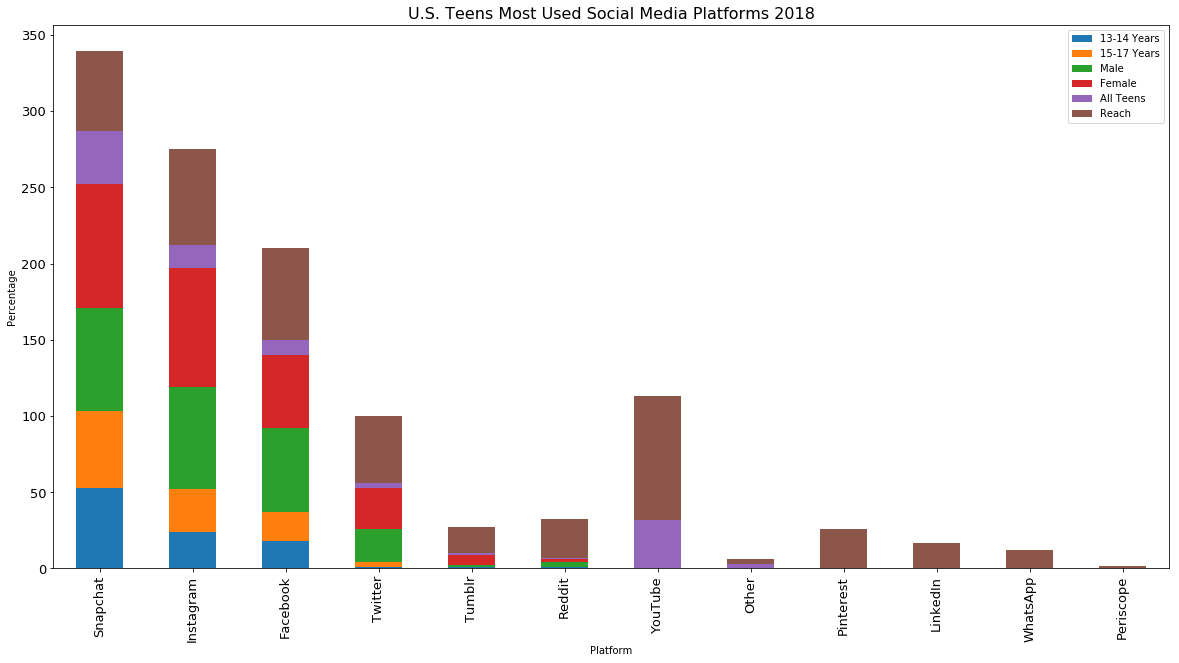

In [31]:
all_platforms_w_reach.plot(kind='bar', figsize=(20,10), fontsize=13, stacked=True)
plt.title('U.S. Teens Most Used Social Media Platforms 2018', fontsize=16)
plt.xlabel('Platform')
plt.ylabel('Percentage')

* Graph just age and gender dataframes

In [32]:
by_age_and_gender.set_index("Platform",drop=True,inplace=True)

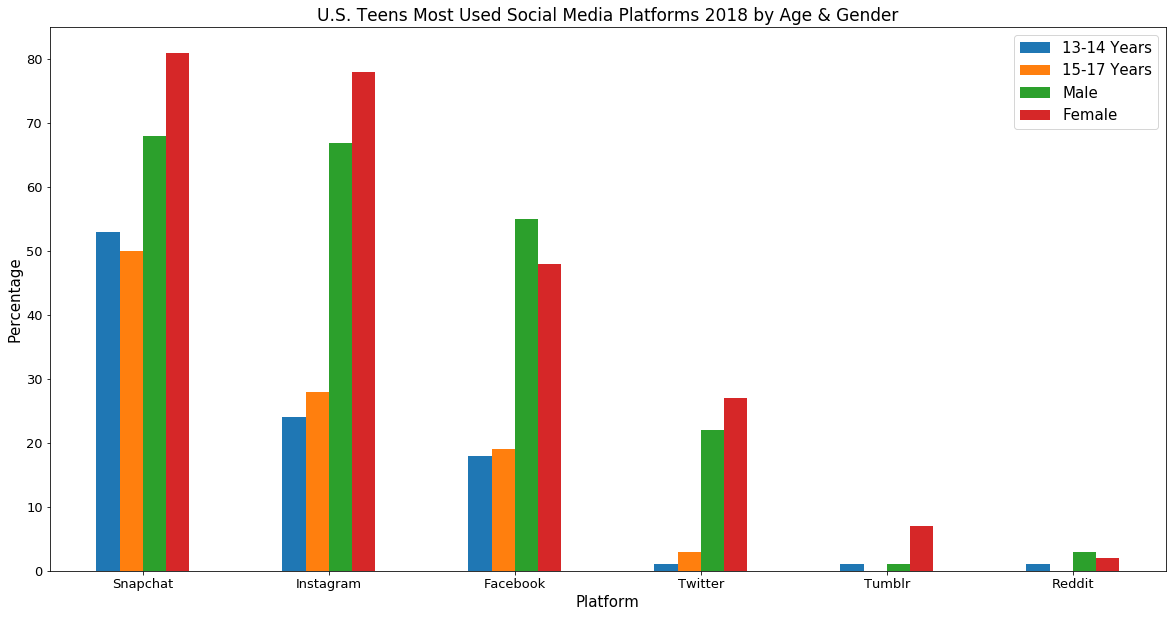

In [33]:
by_age_and_gender.plot(kind='bar', figsize=(20,10), fontsize=13)
plt.title('U.S. Teens Most Used Social Media Platforms 2018 by Age & Gender', fontsize=17)
plt.xlabel('Platform', fontsize=15)
plt.xticks(rotation='horizontal')
plt.ylabel('Percentage', fontsize=15)
plt.legend(fontsize=15)
plt.savefig('Teens_Most_Used_Social_Media_Platforms_2018_by_Age_&_Gender.png')